## AMPL - Introduction to music21 (3)
#### This notebook presents two new functionalites of music21.

In [1]:
from music21 import *

### Retrieving elements by offset

Let's load a score and retrieve their vocal and instrumental parts

In [2]:
s = converter.parse('lseh-YiLunMing-WenZhaoGuan-1.xml')
pv = s.parts[0] # Vocal part
pi = s.parts[1] # Instrumental part

Now, let's retrieve just the melodic phrase used for singing the lyrics "窗前."
<br/>
In order to do that, let's find the offsets of the first and last notes sung in that melodic phrase.

In [3]:
a = '窗'
b = '愁'
phraseBoundaries = []
nn = pv.flat.notes.stream()
for n in nn:
    if n.lyric != None:
        if n.lyric == a:
            phraseBoundaries.append(n.offset)
            print('Start offset:', n.offset)
        elif n.lyric == b:
            phraseBoundaries.append(n.previous().offset)
            print('End offset:', n.previous().offset)

Start offset: 73.0
End offset: 94.0


The method `.getElementsByOffset()` is thought for retrieving elements according to their offsets. If just one offset is input, it retrieves the element(s) at that offset.

In [40]:
section = nn.getElementsByOffset(73.6).stream()
for n2 in section:
    if n2.quarterLength > 0: # Skip grace notes
        print(n2)
        

#if len(section) == 0:
#    print("NADA AQUÍ")
#print(section.elements)
#firstNote = section[0]
#print('This note is {} with lyric {}'.format(firstNote.nameWithOctave, firstNote.lyric))
#print(section[0])

In [5]:
section = nn.getElementsByOffset(phraseBoundaries[1]).stream()
print(section.elements)
firstNote = section[0]
print('This note is {} with lyric {}'.format(firstNote.nameWithOctave, firstNote.lyric))

(<music21.note.Note C#>,)
This note is C#4 with lyric None


If two offsets are input to the `.getElementsByOffset()` method, all the elements between those two offsets are retrieved.

In [6]:
section = nn.getElementsByOffset(phraseBoundaries[0], phraseBoundaries[1])
section.show()

Since we retrieved notes from the stream `nn` we created, and the first offset is then 73, extra measures are created to fill the gap until that offset.
<br/>
To avoid that, we can instead retrieve measures from the part stream `pv`.

In [7]:
section = pv.getElementsByOffset(phraseBoundaries[0], phraseBoundaries[1])
section.show()

Now we didn't get the extra measures, but we are missing the first one of our melodic phrase. Why is that?
<br/>
Let's check the documentation for the `.getElementsByOffset()` method.

In [8]:
pv.getElementsByOffset?

It seems that we need to set the `mustBeginInSpan` parameter to `False`.

In [9]:
section = pv.getElementsByOffset(phraseBoundaries[0], phraseBoundaries[1], mustBeginInSpan=False)
section.show()

### Analytical tools

Music21 brings many analytical tools, that can be found in its [documentation](https://web.mit.edu/music21/doc/usersGuide/usersGuide_22_graphing.html). However, you should understand them well in order to know what they really represent.

Let's create a simple score using `tinyNotation`.

In [10]:
s = converter.parse('tinyNotation: G16 G G G c1')
s.show()

Now, let's use music21 analytical tools to create a pitch histogram. It's as simple as this:

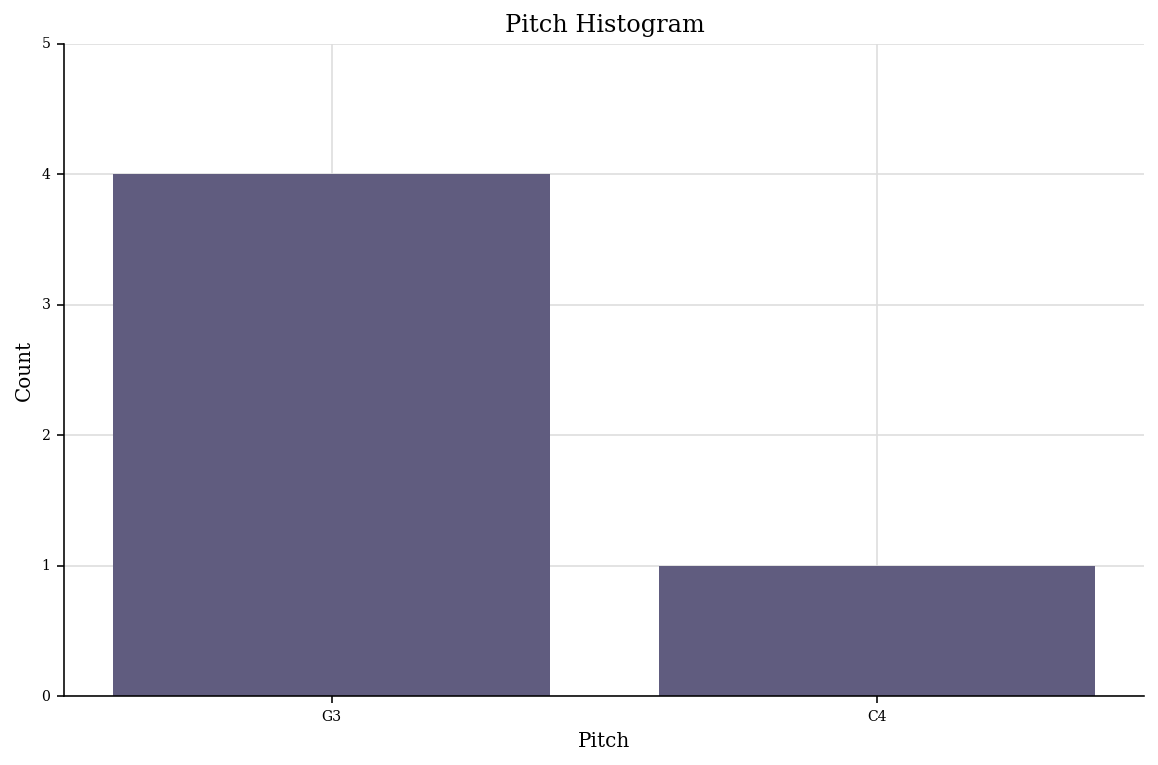

In [11]:
s.plot('histogram', 'pitch')

Does it really represent what we need? Otherwise, we would like to create our own histogram

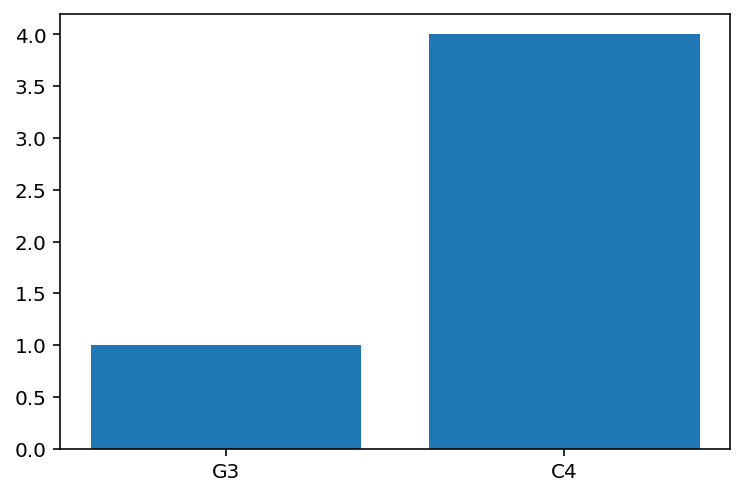

In [13]:
import matplotlib.pyplot as plt

nn = s.flat.notes.stream()

pitchHistogram = {}

for n in nn:
    pitchHistogram[n.nameWithOctave] = pitchHistogram.get(n.nameWithOctave, 0) + n.quarterLength
    
xValues = pitchHistogram.keys()
yValues = pitchHistogram.values()

plt.bar(xValues, yValues)
plt.show()